In [116]:
# 0: 사기가 아닌 정상적인 ㅣㄴ용카드 트랜잭션 데이터
# 1: 신용카드 사기 트랜잭션
# 전체 데이터의 약 0.172% 만이 레이블 값이 1, 즉 사기 트랜잭션 
# 사기 검출 또는 이상 검출 과 같은 데잍 ㅓ세트는 이처럼 레이블 값이 극도로 불균형한 분포를 가지기 쉬움 

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [118]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [119]:
# Time : 데이터 생성 관련한 작업용 속성
# Amount : 신용카드 트랜잭션 금액
# Class : 0(정상), 1(사기)

In [120]:
card_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

In [122]:
def get_train_test_split(df=None):
  
  df_copy = get_preprocessed_df(df)
  
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
  
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_split(card_df)

In [123]:
print("학습 데이터 레이블 값 비율")
print(y_train.value_counts()/y_train.shape[0] * 100)
print("테스트 데이터 레이블 값 비율")
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [124]:
from sklearn.metrics import accuracy_score   # 정확도
from sklearn.metrics import precision_score  # 정밀도
from sklearn.metrics import recall_score     # 재현율
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.metrics import f1_score         # f1-score
from sklearn.metrics import roc_auc_score    # roc-auc

def get_clf_eval(y_test, pred=None, pred_proba=None):
	confusion = confusion_matrix(y_test, pred)
	accuracy = accuracy_score(y_test, pred)
	precision = precision_score(y_test, pred)
	recall = recall_score(y_test, pred)
	f1 = f1_score(y_test, pred)
	roc_auc = roc_auc_score(y_test, pred_proba)
	print("오차 행렬")
	print(confusion)
	print("정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}".format(accuracy, precision, recall, f1, roc_auc))

In [125]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85279    16]
 [   61    87]]
정확도:0.9991, 정밀도:0.8447, 재현율:0.5878, F1:0.6932, AUC:0.9560


In [126]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:,1]
  get_clf_eval(tgt_test, pred, pred_proba)

In [127]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도:0.9995, 정밀도:0.9573, 재현율:0.7568, F1:0.8453, AUC:0.9790


<AxesSubplot:xlabel='Amount', ylabel='Density'>

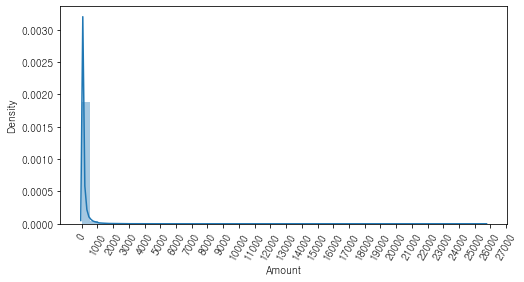

In [128]:
# 데이터 분포도 변환 후 모델 학습/예측/평가
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [129]:
card_df['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [130]:
card_df = pd.read_csv('./creditcard.csv')

In [131]:
from sklearn.preprocessing import StandardScaler
# Amount 피처값 변환하는 로직 

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  
  # 변환된 Amount피처를 'Amount_Scaled' 피처명으로 변경 df 앞 칼럼으로 입력 
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  
  # 기존 Time, Amount 피처 삭제
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  
  return df_copy

In [137]:
X_train, X_test, y_train, y_test = get_train_test_split(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

print("### LightGBM 예측 성능 ###")
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도:0.9992, 정밀도:0.8654, 재현율:0.6081, F1:0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도:0.9995, 정밀도:0.9569, 재현율:0.7500, F1:0.8409, AUC:0.9779


In [138]:
# 로그 변환을 수행하여 확인 

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time','Amount'], axis=1, inplace=True)
  return df_copy

In [139]:
X_train, X_test, y_train, y_test = get_train_test_split(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

print("### LightGBM 예측 성능 ###")
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도:0.9992, 정밀도:0.8812, 재현율:0.6014, F1:0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도:0.9995, 정밀도:0.9576, 재현율:0.7635, F1:0.8496, AUC:0.9796


<AxesSubplot:xlabel='Amount_Scaled', ylabel='Density'>

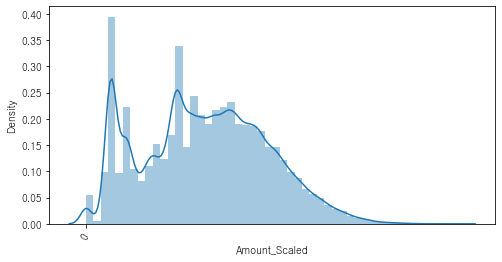

In [141]:
# 로그 변환 후 확인 
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(X_train['Amount_Scaled'])

<AxesSubplot:>

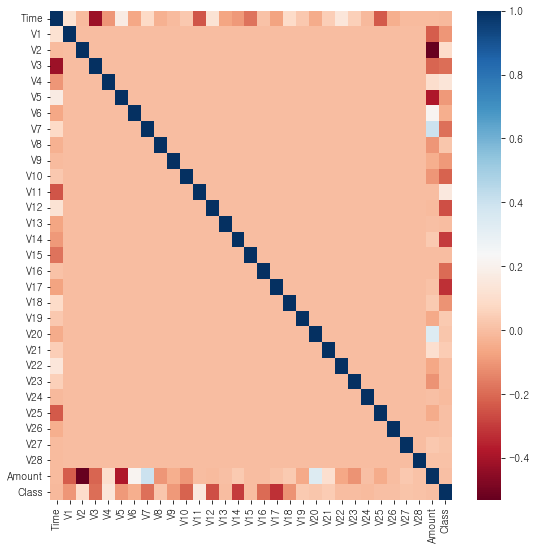

In [142]:
# 이상치 데이터 제거 후 모델 학습/예측/평가 
# 매우 많은 피처가 있을 경우 이들 중 결정값(레이블) 과 가장 상관성이 ㄴ높은 피ㅓ들을 위주로 이상치를 검출하는 것이 좋다.
# 진한 파란색에 가까울수록 양의 상관관계가 높다.
# 진한 빨간색에 가까울수록 음의 상관관계가 높다. 

# class와 가장 상관계수가 높아 보이는 것은 v14, v17 
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [153]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  #fraud에 해당하는 column 데이터만 추출
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  
  iqr = quantile_75-quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  
  # 최대값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고, DataFrame idex 반환
  outlier_index = fraud[ (fraud<lowest_val) | (fraud>highest_val ) ].index
  return outlier_index

In [154]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [155]:
# 로그 변환을 수행하여 확인 

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time','Amount'], axis=1, inplace=True)
  
  # 이상치 제거 추가
  outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

X_train, X_test, y_train, y_test = get_train_test_split(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

print("### LightGBM 예측 성능 ###")
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도:0.9993, 정밀도:0.8750, 재현율:0.6712, F1:0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도:0.9996, 정밀도:0.9603, 재현율:0.8288, F1:0.8897, AUC:0.9780


In [165]:
# SMOTE 오버 샘플리 적용 후 모델 학습/예측/평가
# SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 샘플링 하여야 한다. 

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ", X_train.shape, y_train.shape)
print("SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ", X_train_over.shape, y_train_over.shape)
print("SMOTE 적용 후 레이블 값 분포: \n", pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [166]:
print("### 로지스틱 회귀 예측 성능 ###")
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test )

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[82937  2358]
 [   11   135]]
정확도:0.9723, 정밀도:0.0542, 재현율:0.9247, F1:0.1023, AUC:0.9737


In [167]:
print("### LightGBM 예측 성능 ###")
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

# SMOTE를 적용하면 재현율은 높아지나, 정밀도가 낮아지는 것이 일반적
# 좋은 SMOTE 패키지일수록 재현율 증가율은 높이고 정밀도 감소율은 낮출 수 있도록 과학적으로 데이터를 증식

### LightGBM 예측 성능 ###
오차 행렬
[[85283    12]
 [   22   124]]
정확도:0.9996, 정밀도:0.9118, 재현율:0.8493, F1:0.8794, AUC:0.9814
